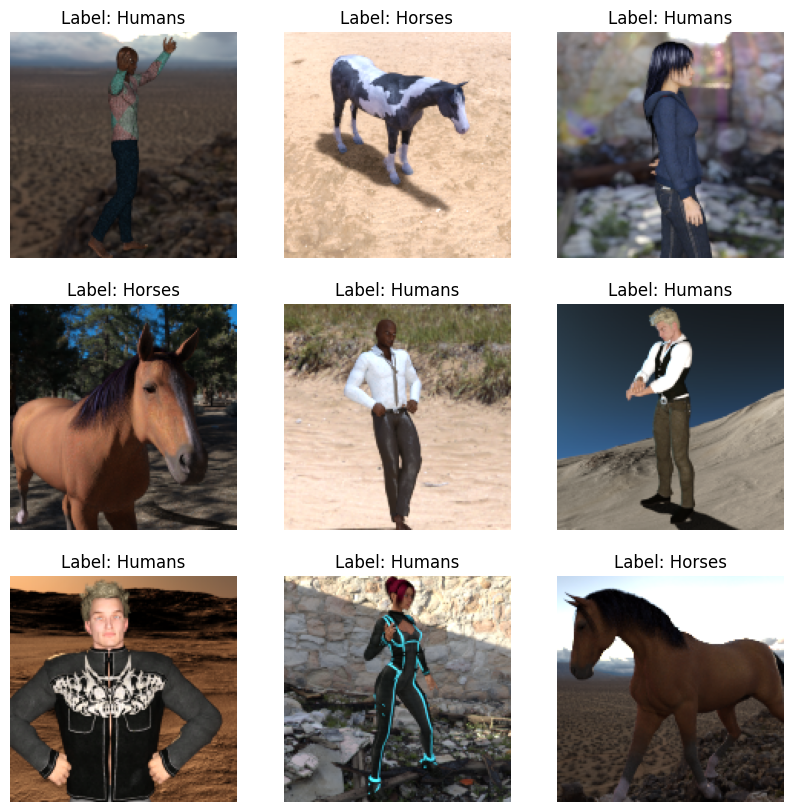

Training VGG16 with learning rate: 0.001
Epoch 1/5


c:\Users\Priyamvadha Pradeep\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 117s 5s/step - accuracy: 0.5169 - loss: 31.4457 - val_accuracy: 0.7805 - val_loss: 0.5864
Epoch 2/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 100s 5s/step - accuracy: 0.7910 - loss: 0.5455 - val_accuracy: 0.9268 - val_loss: 0.2655
Epoch 3/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 98s 5s/step - accuracy: 0.8318 - loss: 0.6713 - val_accuracy: 0.9146 - val_loss: 0.2601
Epoch 4/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 118s 6s/step - accuracy: 0.9215 - loss: 0.2374 - val_accuracy: 0.9329 - val_loss: 0.1739
Epoch 5/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 111s 5s/step - accuracy: 0.9753 - loss: 0.1188 - val_accuracy: 0.9512 - val_loss: 0.1177
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9799 - loss: 0.0715
VGG16 Test Loss: 0.08039428293704987, Test Accuracy: 0.9757281541824341
Training ResNet50 with learning rate: 0.001
Epoch 1/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 117s 4s/step - accuracy: 0.8440 - loss: 1.4662 - val_accuracy: 0.4817 - val_loss: 12291.5420
Epoch 2/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step - accuracy: 0.9

c:\Users\Priyamvadha Pradeep\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Priyamvadha Pradeep\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Priyamvadha Pradeep\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

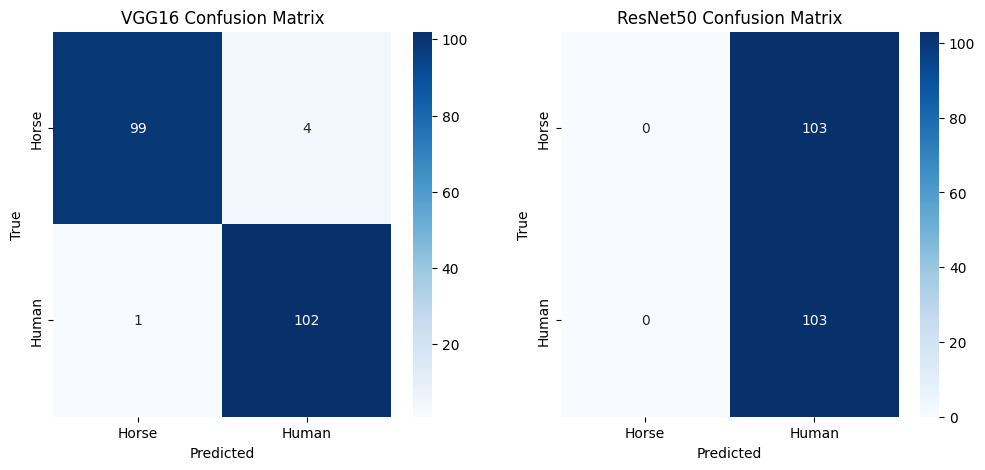

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Set data directory
data_dir = r"C:\Users\Priyamvadha Pradeep\Desktop\DL Mid Model\horse-or-human"

# Load the dataset
def load_data(data_dir):
    X = []
    y = []
    classes = ['horses', 'humans']  # Class names

    for label, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = load_img(img_path, target_size=(148, 148))
            img_array = img_to_array(img)
            X.append(img_array)
            y.append(label)

    return np.array(X), np.array(y)

X, y = load_data(data_dir)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize some samples from the dataset
def plot_samples(X, y):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(X[i].astype('uint8'))
        plt.title('Label: ' + ('Horses' if y[i] == 0 else 'Humans'))
        plt.axis('off')
    plt.show()

plot_samples(X_train, y_train)

# Data augmentation
datagen = ImageDataGenerator(horizontal_flip=True, rotation_range=20, validation_split=0.2)

# Create flow from directory for training and validation
train_generator = datagen.flow(X_train, y_train, subset='training', batch_size=32)
val_generator = datagen.flow(X_train, y_train, subset='validation', batch_size=32)

# Define model creation functions
def create_model_vgg16(learning_rate=0.001):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(148, 148, 3))
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_model_resnet50(learning_rate=0.001):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(148, 148, 3))
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Set hyperparameters
learning_rate = 0.001

# Train VGG16 model
print(f'Training VGG16 with learning rate: {learning_rate}')
model_vgg = create_model_vgg16(learning_rate=learning_rate)

history_vgg = model_vgg.fit(train_generator, 
                             validation_data=val_generator, 
                             epochs=5,  # Change epochs to 5
                             callbacks=[EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)])

# Evaluate VGG16 model
test_loss_vgg, test_accuracy_vgg = model_vgg.evaluate(X_test, y_test)
print(f'VGG16 Test Loss: {test_loss_vgg}, Test Accuracy: {test_accuracy_vgg}')

# Create a test generator for ResNet
test_datagen = ImageDataGenerator()  # No augmentation for testing
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

# Train ResNet50 model
print(f'Training ResNet50 with learning rate: {learning_rate}')
model_resnet = create_model_resnet50(learning_rate=learning_rate)

history_resnet = model_resnet.fit(train_generator, 
                                   validation_data=val_generator, 
                                   epochs=5)

# Evaluate ResNet50 model
test_loss_resnet, test_accuracy_resnet = model_resnet.evaluate(test_generator)
print(f'ResNet50 Test Loss: {test_loss_resnet}, Test Accuracy: {test_accuracy_resnet}')

# Predictions and classification report
y_pred_vgg = (model_vgg.predict(X_test) > 0.5).astype("int32")
y_pred_resnet = (model_resnet.predict(X_test) > 0.5).astype("int32")

# Classification report
print("Classification Report for VGG16:")
print(classification_report(y_test, y_pred_vgg))

print("Classification Report for ResNet50:")
print(classification_report(y_test, y_pred_resnet))

# Confusion matrices
conf_matrix_vgg = confusion_matrix(y_test, y_pred_vgg)
conf_matrix_resnet = confusion_matrix(y_test, y_pred_resnet)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_vgg, annot=True, fmt='d', cmap='Blues', xticklabels=['Horse', 'Human'], yticklabels=['Horse', 'Human'])
plt.title('VGG16 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_resnet, annot=True, fmt='d', cmap='Blues', xticklabels=['Horse', 'Human'], yticklabels=['Horse', 'Human'])
plt.title('ResNet50 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Set data directory
data_dir = r"C:\Users\Priyamvadha Pradeep\Desktop\DL Mid Model\horse-or-human"

# Load the dataset
def load_data(data_dir):
    X = []
    y = []
    classes = ['horses', 'humans']  # Class names

    for label, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = load_img(img_path, target_size=(148, 148))
            img_array = img_to_array(img)
            X.append(img_array)
            y.append(label)

    return np.array(X), np.array(y)

X, y = load_data(data_dir)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize some samples from the dataset
def plot_samples(X, y):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(X[i].astype('uint8'))
        plt.title('Label: ' + ('Horses' if y[i] == 0 else 'Humans'))
        plt.axis('off')
    plt.show()

plot_samples(X_train, y_train)

# Data augmentation
datagen = ImageDataGenerator(horizontal_flip=True, rotation_range=20, validation_split=0.2)

# Create flow from directory for training and validation
train_generator = datagen.flow(X_train, y_train, subset='training', batch_size=32)
val_generator = datagen.flow(X_train, y_train, subset='validation', batch_size=32)

# Define model creation functions
def create_model_vgg16(learning_rate=0.001):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(148, 148, 3))
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_model_resnet50(learning_rate=0.0001):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(148, 148, 3))
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Set learning rates
learning_rate_vgg = 0.001
learning_rate_resnet = 0.0001

# Train VGG16 model
print(f'Training VGG16 with learning rate: {learning_rate_vgg}')
model_vgg = create_model_vgg16(learning_rate=learning_rate_vgg)

history_vgg = model_vgg.fit(train_generator, 
                             validation_data=val_generator, 
                             epochs=5,  # Change epochs to a higher number if desired
                             callbacks=[EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)])

# Evaluate VGG16 model
test_loss_vgg, test_accuracy_vgg = model_vgg.evaluate(X_test, y_test)
print(f'VGG16 Test Loss: {test_loss_vgg}, Test Accuracy: {test_accuracy_vgg}')

# Create a test generator for ResNet
test_datagen = ImageDataGenerator()  # No augmentation for testing
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

# Train ResNet50 model
print(f'Training ResNet50 with learning rate: {learning_rate_resnet}')
model_resnet = create_model_resnet50(learning_rate=learning_rate_resnet)

history_resnet = model_resnet.fit(train_generator, 
                                   validation_data=val_generator, 
                                   epochs=5)

# Evaluate ResNet50 model
test_loss_resnet, test_accuracy_resnet = model_resnet.evaluate(test_generator)
print(f'ResNet50 Test Loss: {test_loss_resnet}, Test Accuracy: {test_accuracy_resnet}')

# Predictions and classification report
y_pred_vgg = (model_vgg.predict(X_test) > 0.5).astype("int32")
y_pred_resnet = (model_resnet.predict(X_test) > 0.5).astype("int32")

# Classification report
print("Classification Report for VGG16:")
print(classification_report(y_test, y_pred_vgg))

print("Classification Report for ResNet50:")
print(classification_report(y_test, y_pred_resnet))

# Confusion matrices
conf_matrix_vgg = confusion_matrix(y_test, y_pred_vgg)
conf_matrix_resnet = confusion_matrix(y_test, y_pred_resnet)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_vgg, annot=True, fmt='d', cmap='Blues', xticklabels=['Horse', 'Human'], yticklabels=['Horse', 'Human'])
plt.title('VGG16 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_resnet, annot=True, fmt='d', cmap='Blues', xticklabels=['Horse', 'Human'], yticklabels=['Horse', 'Human'])
plt.title('ResNet50 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

model_vgg.summary()
model_resnet.summary()